Logistic Function / Sigmoid Function

In [1]:
import numpy as np
def sigmoid(z):
    return 1/(1+np.exp(-z))

<function matplotlib.pyplot.show(*args, **kw)>

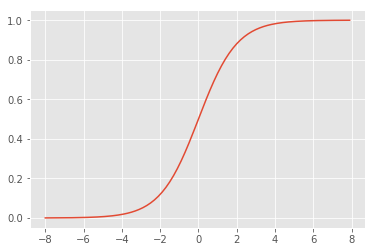

In [2]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

z=np.arange(-8,8,0.1)
y= sigmoid(z)
plt.plot(z,y)
plt.show

Logistic Regression

In [8]:
import pandas as pd
df = pd.read_csv('/Users/ethan/Desktop/AI/python資料科學/python-data-science-practice/Basic Machine Learning/(Mac) w4-1. 基礎機器學習/iris.csv',encoding='big5')
df.head()


,花萼長度,花萼寬度,花瓣長度,花瓣寬度,屬種
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
df.corr()

,花萼長度,花萼寬度,花瓣長度,花瓣寬度
花萼長度,1.000000,-0.109369,0.871754,0.817954
花萼寬度,-0.109369,1.000000,-0.420516,-0.356544
花瓣長度,0.871754,-0.420516,1.000000,0.962757
花瓣寬度,0.817954,-0.356544,0.962757,1.000000


切分訓練資料與測試資料

In [10]:
from sklearn.model_selection import train_test_split
x = df[['花萼長度','花萼寬度']]
y = df[['屬種']]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)
x_test.head()

,花萼長度,花萼寬度
70,5.9,3.2
81,5.5,2.4
120,6.9,3.2
53,5.5,2.3
113,5.7,2.5


標準化（Normalize）參數值

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x_train)
x_train_nor = sc.transform(x_train)
x_test_nor = sc.transform(x_test)
x_test_nor[:10]

array([[ 0.11637891,  0.32166897],
       [-0.35817586, -1.58116155],
       [ 1.30276581,  0.32166897],
       [-0.35817586, -1.81901536],
       [-0.12089848, -1.34330773],
       [ 0.70957236,  0.32166897],
       [ 1.54004319, -0.15403866],
       [-0.35817586, -1.58116155],
       [-1.42592407,  1.27308423],
       [ 1.18412712, -0.62974629]])

訓練資料分類效果（使用兩個參數）

/Users/ethan/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


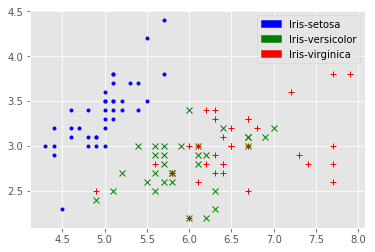

In [122]:
from sklearn.linear_model import LogisticRegression
import matplotlib.patches as mpatches

lr = LogisticRegression()
lr.fit(x_train_nor,y_train)


y_new_index=y_train.reset_index(drop=True)

for i in range(len(x_train_nor)):
    if(y_new_index[i:i+1].loc[i,'屬種']=='Iris-setosa'):
        plt.plot(x_train['花萼長度'].reset_index(drop=True)[i],x_train['花萼寬度'].reset_index(drop=True)[i],'b.')
    elif(y_new_index[i:i+1].loc[i,'屬種']=='Iris-versicolor'):
        plt.plot(x_train['花萼長度'].reset_index(drop=True)[i],x_train['花萼寬度'].reset_index(drop=True)[i],'gx')
    else:
        plt.plot(x_train['花萼長度'].reset_index(drop=True)[i],x_train['花萼寬度'].reset_index(drop=True)[i],'r+')
        
# 標註（補丁patch）
blue_patch = mpatches.Patch(color='blue', label='Iris-setosa')
green_patch = mpatches.Patch(color='green', label='Iris-versicolor')
red_patch = mpatches.Patch(color='red', label='Iris-virginica')
plt.legend(handles=[blue_patch,green_patch,red_patch])        
plt.show()    
        


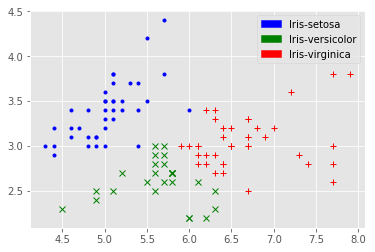

In [123]:
for i in range(len(x_train_nor)):
    if(lr.predict(x_train_nor[i].reshape(1,-1))=='Iris-setosa'):
        plt.plot(x_train['花萼長度'].reset_index(drop=True)[i],x_train['花萼寬度'].reset_index(drop=True)[i],'b.')
    elif(lr.predict(x_train_nor[i].reshape(1,-1))=='Iris-versicolor'):
        plt.plot(x_train['花萼長度'].reset_index(drop=True)[i],x_train['花萼寬度'].reset_index(drop=True)[i],'gx')
    else:
        plt.plot(x_train['花萼長度'].reset_index(drop=True)[i],x_train['花萼寬度'].reset_index(drop=True)[i],'r+')
        
# 標註（補丁patch）
blue_patch = mpatches.Patch(color='blue', label='Iris-setosa')
green_patch = mpatches.Patch(color='green', label='Iris-versicolor')
red_patch = mpatches.Patch(color='red', label='Iris-virginica')
plt.legend(handles=[blue_patch,green_patch,red_patch])        
plt.show()


分類效果測試（使用訓練好的model）

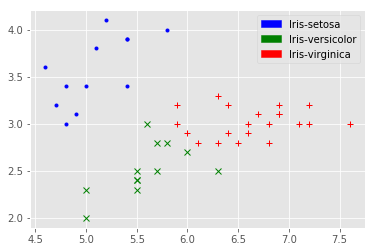

In [124]:
for i in range(len(x_test_nor)):
    if(lr.predict(x_test_nor[i].reshape(1,-1))=='Iris-setosa'):
        plt.plot(x_test['花萼長度'].reset_index(drop=True)[i],x_test['花萼寬度'].reset_index(drop=True)[i],'b.')
    elif(lr.predict(x_test_nor[i].reshape(1,-1))=='Iris-versicolor'):
        plt.plot(x_test['花萼長度'].reset_index(drop=True)[i],x_test['花萼寬度'].reset_index(drop=True)[i],'gx')
    else:
        plt.plot(x_test['花萼長度'].reset_index(drop=True)[i],x_test['花萼寬度'].reset_index(drop=True)[i],'r+')
        
# 標註（補丁patch）
blue_patch = mpatches.Patch(color='blue', label='Iris-setosa')
green_patch = mpatches.Patch(color='green', label='Iris-versicolor')
red_patch = mpatches.Patch(color='red', label='Iris-virginica')
plt.legend(handles=[blue_patch,green_patch,red_patch])  
plt.show()

視覺化混淆矩陣函式（from sklearn官網）

In [125]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
#Source code from: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py

In [126]:
import numpy as np
np.round(lr.predict_proba(x_test_nor),3)#四捨五入到小數點第3位
#分別為那三種的機率

array([[0.328, 0.284, 0.388],
       [0.039, 0.72 , 0.241],
       [0.01 , 0.24 , 0.75 ],
       [0.024, 0.737, 0.239],
       [0.03 , 0.656, 0.313],
       [0.067, 0.277, 0.656],
       [0.002, 0.298, 0.7  ],
       [0.039, 0.72 , 0.241],
       [0.918, 0.064, 0.018],
       [0.002, 0.377, 0.621],
       [0.007, 0.366, 0.627],
       [0.823, 0.029, 0.148],
       [0.159, 0.417, 0.425],
       [0.003, 0.23 , 0.767],
       [0.128, 0.543, 0.329],
       [0.356, 0.388, 0.256],
       [0.013, 0.288, 0.699],
       [0.071, 0.461, 0.468],
       [0.014, 0.443, 0.544],
       [0.   , 0.291, 0.708],
       [0.091, 0.535, 0.374],
       [0.868, 0.102, 0.03 ],
       [0.015, 0.393, 0.591],
       [0.823, 0.151, 0.026],
       [0.006, 0.274, 0.72 ],
       [0.035, 0.852, 0.113],
       [0.762, 0.195, 0.043],
       [0.848, 0.107, 0.045],
       [0.773, 0.121, 0.105],
       [0.063, 0.693, 0.244],
       [0.003, 0.515, 0.482],
       [0.006, 0.274, 0.72 ],
       [0.911, 0.044, 0.045],
       [0.

Evaluation：Confusion Metrics（混淆矩陣）

In [128]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, lr.predict(x_test_nor))
print (cnf_matrix)

[[12  0  0]
 [ 0  9  9]
 [ 0  3 12]]


Confusion matrix, without normalization
[[12  0  0]
 [ 0  9  9]
 [ 0  3 12]]


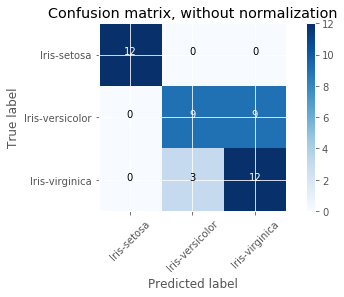

In [129]:
import itertools
target_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
plot_confusion_matrix(cnf_matrix, classes=target_names, title='Confusion matrix, without normalization')

plt.show()

In [131]:
from sklearn.metrics import classification_report

print(classification_report(y_test, lr.predict(x_test_nor), target_names=target_names))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.75      0.50      0.60        18
 Iris-virginica       0.57      0.80      0.67        15

    avg / total       0.76      0.73      0.73        45

